<a href="https://colab.research.google.com/github/AmirRezaBehzad/IRD-Based-Medical-Image-Steganography/blob/main/IRDBasedSteganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

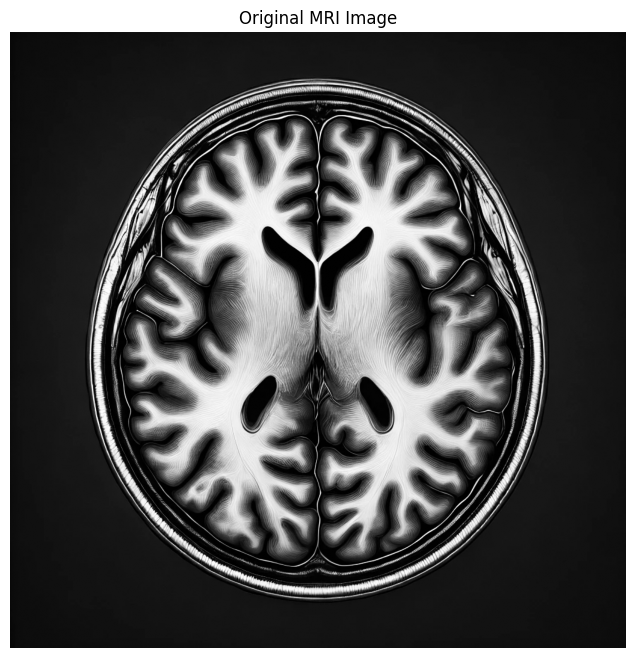

✅ Image Loaded Successfully! Dimensions: 1024x1024

🔹 Pixel Intensity Matrix (Small Section of Image):

🔹 Minimum Intensity: 0 at position (2, 9)
🔹 Maximum Intensity: 255 at position (0, 46)
[[ 9  9  9 ... 15 18 18]
 [ 8  8  8 ... 13 13 13]
 [ 7  7  7 ...  7  7  7]
 ...
 [ 9  9  9 ... 16 16 16]
 [ 9  9  9 ... 16 16 16]
 [ 9  9  9 ... 16 16 16]]


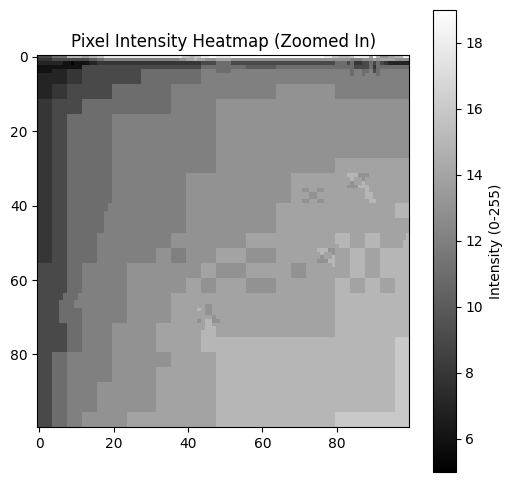

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image

# Load the MRI image
image_path = "/content/drive/MyDrive/Brain6.webp"  # Change this if using Google Drive
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale

# Check if the image is loaded
if original_img is None:
    print("Error: Image not found. Please check the file path!")
else:
    # Display the image
    plt.figure(figsize=(8,8))
    plt.imshow(original_img, cmap='gray')
    plt.title("Original MRI Image")
    plt.axis('off')
    plt.show()

    # Get image dimensions
    height, width = original_img.shape
    print(f"✅ Image Loaded Successfully! Dimensions: {height}x{width}")


  #BIZ
      # ------------------- BIZ ---------------------
    # Print pixel intensity values as a matrix
    print("\n🔹 Pixel Intensity Matrix (Small Section of Image):")

    # Select a small 10x10 section from the top-left for easy viewing
    small_section = original_img[:100, :100]


    # Find max and min intensity values & their positions
    min_intensity = np.min(original_img)  # Smallest pixel value between all the pixels
    max_intensity = np.max(original_img)  # Largest pixel value between all the pixels

    # Get the positions (row, col) of the max & min intensity pixels
    min_position = np.unravel_index(np.argmin(small_section), small_section.shape)
    max_position = np.unravel_index(np.argmax(small_section), small_section.shape)

    # Print the min and max intensity with their positions
    print(f"\n🔹 Minimum Intensity: {min_intensity} at position {min_position}")
    print(f"🔹 Maximum Intensity: {max_intensity} at position {max_position}")

    # Print as a matrix
    print(small_section)

    # Optional: Display intensity values as an image heatmap
    plt.figure(figsize=(6,6))
    plt.imshow(small_section, cmap='gray', interpolation='nearest')
    plt.colorbar(label="Intensity (0-255)")  # Add color scale for intensity
    plt.title("Pixel Intensity Heatmap (Zoomed In)")
    plt.show()

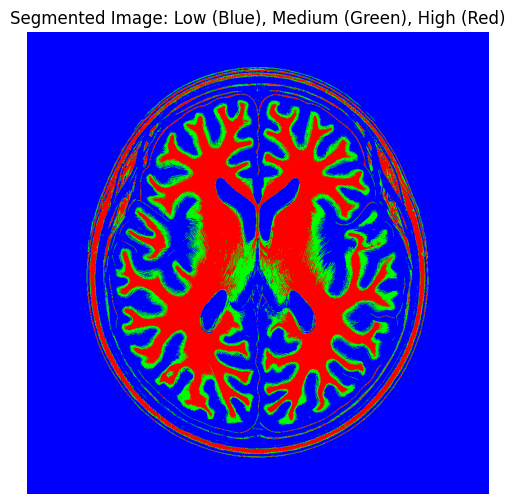

Low-Intensity Region: 73.94%
Medium-Intensity Region: 9.73%
High-Intensity Region: 16.33%
Low Intensity Mask (First 10 pixels): [ True  True  True  True  True  True  True  True  True  True]
Medium Intensity Mask (First 10 pixels): [False False False False False False False False False False]
High Intensity Mask (First 10 pixels): [False False False False False False False False False False]


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define threshold values for segmentation
t1 = 86  # Threshold 1 (Separates Low and Medium)
t2 = 171 # Threshold 2 (Separates Medium and High)

# Function to segment the image into three regions
def segment_image(image, t1, t2):
    # Create masks for each region
    low_intensity = (image < t1)  # Low-Intensity Region
    medium_intensity = (image >= t1) & (image < t2)  # Medium-Intensity Region
    high_intensity = (image >= t2)  # High-Intensity Region

    return low_intensity, medium_intensity, high_intensity

# Apply segmentation
low_region, medium_region, high_region = segment_image(original_img, t1, t2)

# Create a color-coded visualization (Matplotlib expects RGB format)
segmented_img = np.zeros((*original_img.shape, 3), dtype=np.uint8)  # Create 3-channel RGB image
segmented_img[low_region] = [0, 0, 255]  # Blue for Low-Intensity Region
segmented_img[medium_region] = [0, 255, 0]  # Green for Medium-Intensity Region
segmented_img[high_region] = [255, 0, 0]  # Red for High-Intensity Region

# Display the segmented image
plt.figure(figsize=(6,6))
plt.imshow(segmented_img)
plt.title("Segmented Image: Low (Blue), Medium (Green), High (Red)")
plt.axis('off')
plt.show()

# Print the percentage of pixels in each region
total_pixels = original_img.size
print(f"Low-Intensity Region: {np.sum(low_region)/total_pixels:.2%}")
print(f"Medium-Intensity Region: {np.sum(medium_region)/total_pixels:.2%}")
print(f"High-Intensity Region: {np.sum(high_region)/total_pixels:.2%}")



#BIZ
# Print some pixel values (Example: first 10 values from each mask)
print("Low Intensity Mask (First 10 pixels):", low_region.flatten()[:10])
print("Medium Intensity Mask (First 10 pixels):", medium_region.flatten()[:10])
print("High Intensity Mask (First 10 pixels):", high_region.flatten()[:10])


🔹 DEBUGGING: LSB Embedding Process

📍 Pixel[0, 0] = 9 (Binary: 00001001)
   - Region: Low
   - Embedding Bit: 0 into 3th LSB
   - Cleared Pixel: 00001001
   - New Pixel: 00001001 (Decimal: 9)

📍 Pixel[0, 1] = 9 (Binary: 00001001)
   - Region: Low
   - Embedding Bit: 1 into 3th LSB
   - Cleared Pixel: 00001001
   - New Pixel: 00001101 (Decimal: 13)

📍 Pixel[0, 2] = 9 (Binary: 00001001)
   - Region: Low
   - Embedding Bit: 0 into 3th LSB
   - Cleared Pixel: 00001001
   - New Pixel: 00001001 (Decimal: 9)

📍 Pixel[0, 3] = 9 (Binary: 00001001)
   - Region: Low
   - Embedding Bit: 0 into 3th LSB
   - Cleared Pixel: 00001001
   - New Pixel: 00001001 (Decimal: 9)

📍 Pixel[0, 4] = 11 (Binary: 00001011)
   - Region: Low
   - Embedding Bit: 1 into 3th LSB
   - Cleared Pixel: 00001011
   - New Pixel: 00001111 (Decimal: 15)

📍 Pixel[0, 5] = 11 (Binary: 00001011)
   - Region: Low
   - Embedding Bit: 0 into 3th LSB
   - Cleared Pixel: 00001011
   - New Pixel: 00001011 (Decimal: 11)

📍 Pixel[0, 6] = 

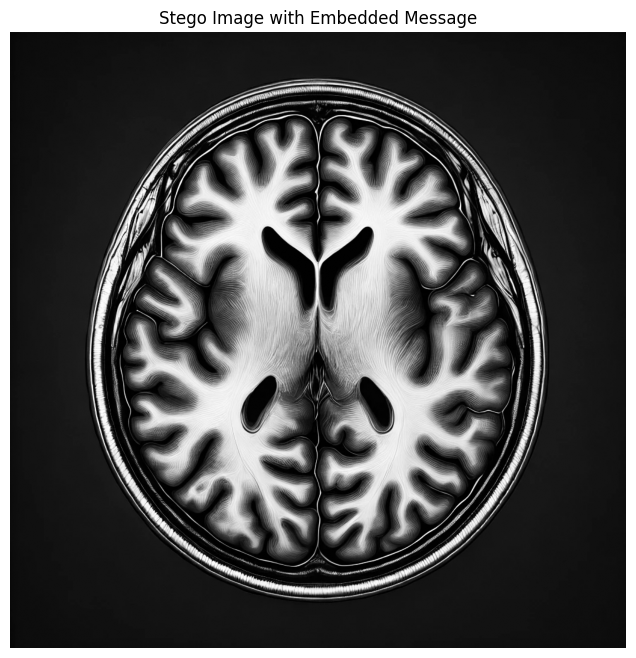

✅ Stego image saved successfully!


In [ ]:
def text_to_binary(text):
    """ Convert text message into a binary string """
    return ''.join(format(ord(char), '08b') for char in text)

def embed_lsb_debug(image, message):
    """ Embed secret binary message into LSBs of the MRI image with Debugging Output """
    binary_message = text_to_binary(message) + '1111111111111110'  # End-of-message delimiter
    data_index = 0  # Pointer to track which bit to embed
    stego_image = np.copy(image)  # Make a copy of the image

    print("\n🔹 DEBUGGING: LSB Embedding Process")

    for i in range(image.shape[0]):  # Loop over rows
        for j in range(image.shape[1]):  # Loop over columns
            pixel = image[i, j]  # Get the pixel value

            # Determine the region of the pixel
            if pixel < t1:  # Low-Intensity Region
                lsb_count = 3  # Modify 3rd LSB
            elif t1 <= pixel < t2:  # Medium-Intensity Region
                lsb_count = 2  # Modify 2nd LSB
            else:  # High-Intensity Region
                lsb_count = 1  # Modify 1st LSB

            if data_index < len(binary_message):  # Ensure we still have bits to embed
                message_bit = int(binary_message[data_index])  # Get the bit to embed

                # Debugging prints before modification
                print(f"\n📍 Pixel[{i}, {j}] = {pixel} (Binary: {bin(pixel)[2:].zfill(8)})")
                print(f"   - Region: {'Low' if lsb_count == 3 else 'Medium' if lsb_count == 2 else 'High'}")
                print(f"   - Embedding Bit: {message_bit} into {lsb_count}th LSB")

                # Step 1: Clear the target LSB
                cleared_pixel = pixel & ~(1 << (lsb_count - 1))

                # Step 2: Insert the new bit
                new_pixel = cleared_pixel | (message_bit << (lsb_count - 1))

                # Debugging prints after modification
                print(f"   - Cleared Pixel: {bin(cleared_pixel)[2:].zfill(8)}")
                print(f"   - New Pixel: {bin(new_pixel)[2:].zfill(8)} (Decimal: {new_pixel})")

                stego_image[i, j] = new_pixel  # Replace pixel with modified version
                data_index += 1  # Move to next bit

            if data_index >= len(binary_message):  # Stop if message is fully embedded
                break
        if data_index >= len(binary_message):
            break

    print("\n✅ Steganography Process Completed!")

    return stego_image

# Define a secret message
secret_message = "Hello MRI!"

# Apply LSB embedding with Debugging
stego_img = embed_lsb_debug(original_img, secret_message)

# Display the stego image
plt.figure(figsize=(8,8))
plt.imshow(stego_img, cmap='gray')
plt.title("Stego Image with Embedded Message")
plt.axis('off')
plt.show()

# Save the stego image (optional)
cv2.imwrite("/content/stego_image.png", stego_img)
print("✅ Stego image saved successfully!")

In [ ]:
def binary_to_text(binary_string):
    """ Convert a binary string back to text """
    chars = [chr(int(binary_string[i:i+8], 2)) for i in range(0, len(binary_string), 8)]
    return ''.join(chars)

def extract_lsb(image):
    """ Extract secret binary message from LSBs of the stego image """
    binary_message = ""

    print("\n🔹 DEBUGGING: LSB Extraction Process")

    for i in range(image.shape[0]):  # Loop over rows
        for j in range(image.shape[1]):  # Loop over columns
            pixel = image[i, j]  # Get the pixel value

            # Determine the LSB level based on pixel intensity
            if pixel < t1:  # Low-Intensity Region
                lsb_count = 3  # Extract from 3rd LSB
            elif t1 <= pixel < t2:  # Medium-Intensity Region
                lsb_count = 2  # Extract from 2nd LSB
            else:  # High-Intensity Region
                lsb_count = 1  # Extract from 1st LSB

            # Extract the bit from the pixel
            extracted_bit = (pixel >> (lsb_count - 1)) & 1
            binary_message += str(extracted_bit)  # Append the extracted bit to the message

            # Debugging prints
            if len(binary_message) < 50:  # Print only the first 50 bits for clarity
                print(f"📍 Pixel[{i}, {j}] = {pixel} (Binary: {bin(pixel)[2:].zfill(8)})")
                print(f"   - Region: {'Low' if lsb_count == 3 else 'Medium' if lsb_count == 2 else 'High'}")
                print(f"   - Extracted Bit: {extracted_bit}")

            # Check for the end-of-message delimiter
            if binary_message.endswith("1111111111111110"):
                print("\n✅ End of message detected!")
                break
        if binary_message.endswith("1111111111111110"):
            break

    # Remove the end-of-message delimiter
    binary_message = binary_message[:-16]

    # Convert binary message to text
    extracted_text = binary_to_text(binary_message)

    print(f"\n🔹 Extracted Message: {extracted_text}")
    return extracted_text

# Extract the secret message from the stego image
extracted_message = extract_lsb(stego_img)


🔹 DEBUGGING: LSB Extraction Process
📍 Pixel[0, 0] = 9 (Binary: 00001001)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 1] = 13 (Binary: 00001101)
   - Region: Low
   - Extracted Bit: 1
📍 Pixel[0, 2] = 9 (Binary: 00001001)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 3] = 9 (Binary: 00001001)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 4] = 15 (Binary: 00001111)
   - Region: Low
   - Extracted Bit: 1
📍 Pixel[0, 5] = 11 (Binary: 00001011)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 6] = 11 (Binary: 00001011)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 7] = 11 (Binary: 00001011)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 8] = 11 (Binary: 00001011)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 9] = 15 (Binary: 00001111)
   - Region: Low
   - Extracted Bit: 1
📍 Pixel[0, 10] = 15 (Binary: 00001111)
   - Region: Low
   - Extracted Bit: 1
📍 Pixel[0, 11] = 11 (Binary: 00001011)
   - Region: Low
   - Extracted Bit: 0
📍 Pixel[0, 12] = 10 (Binary: 00001010)
 